# Linear Regression - Bike Sharing System 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free. Many bike share systems allow people to
borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
• A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end,and the economy restores to a healthy state.
• They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands

What needs to be done
1)  Create a linear model that describes the effect of various features on price.
2)  The model should be interpretable so that mangement can undertand it



## The steps to be followed in this exercise are as follows:

 1) [Reading, understanding and visualizing the data](#step1--data-understanding) 
 2) [Preparing the data for model training (train-test split, rescaling)](#step-2-preparing-the-data-for-model-training-train-test-split-rescaling)
 3) [Training the model](#step-3-training-the-model) 
 4) [Residual analysis](##step-4-residual-analysis)
 5) [Prediction and evaluation of the test set](#step-5-prediction-and-evaluation-of-the-test-set)

# Step1 : Data Understanding

Importing the libraries, reading , understanding the data and visualizing the data.


In [567]:
# Importing all libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings to avoid version problems
import warnings
warnings.filterwarnings('ignore')

In [568]:
bike_df = pd.read_csv("day.csv")
# printing first 5 rows
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [569]:
# printing last 5 rows
bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


**Observations**: This dataset does not contain any headers or footers that need to be cleaned.

In [570]:
# Number of Rows and Columns:
bike_df.shape

(730, 16)

In [571]:
# Datatypes of each column
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [572]:
# Missing values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [573]:
# Calculate the total number of columns with missing values
num_columns_with_missing_values = bike_df.isnull().any().sum()

print(f"Total number of columns with missing values: {num_columns_with_missing_values}")

Total number of columns with missing values: 0


# Observation 
There are 730 rows an 16 columns
There are no columns with any mising values and all columns are numeric

In [574]:
# dropping unnecessary columns which are not part of the feature list.
bike_df = bike_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


**Mapping of categorical columns**:
All the categorical variables mapped to numeric values where number of distinct values >2
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week  (0- Sun,1-Mon )
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



In [575]:
## getting the infor of the column data types and not null count
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Data Analysis

Based on our data analysis plan, we will be conducting the following steps:
1. Univariate Analysis
2. Segment Analysis
3. Bivariate Analysis

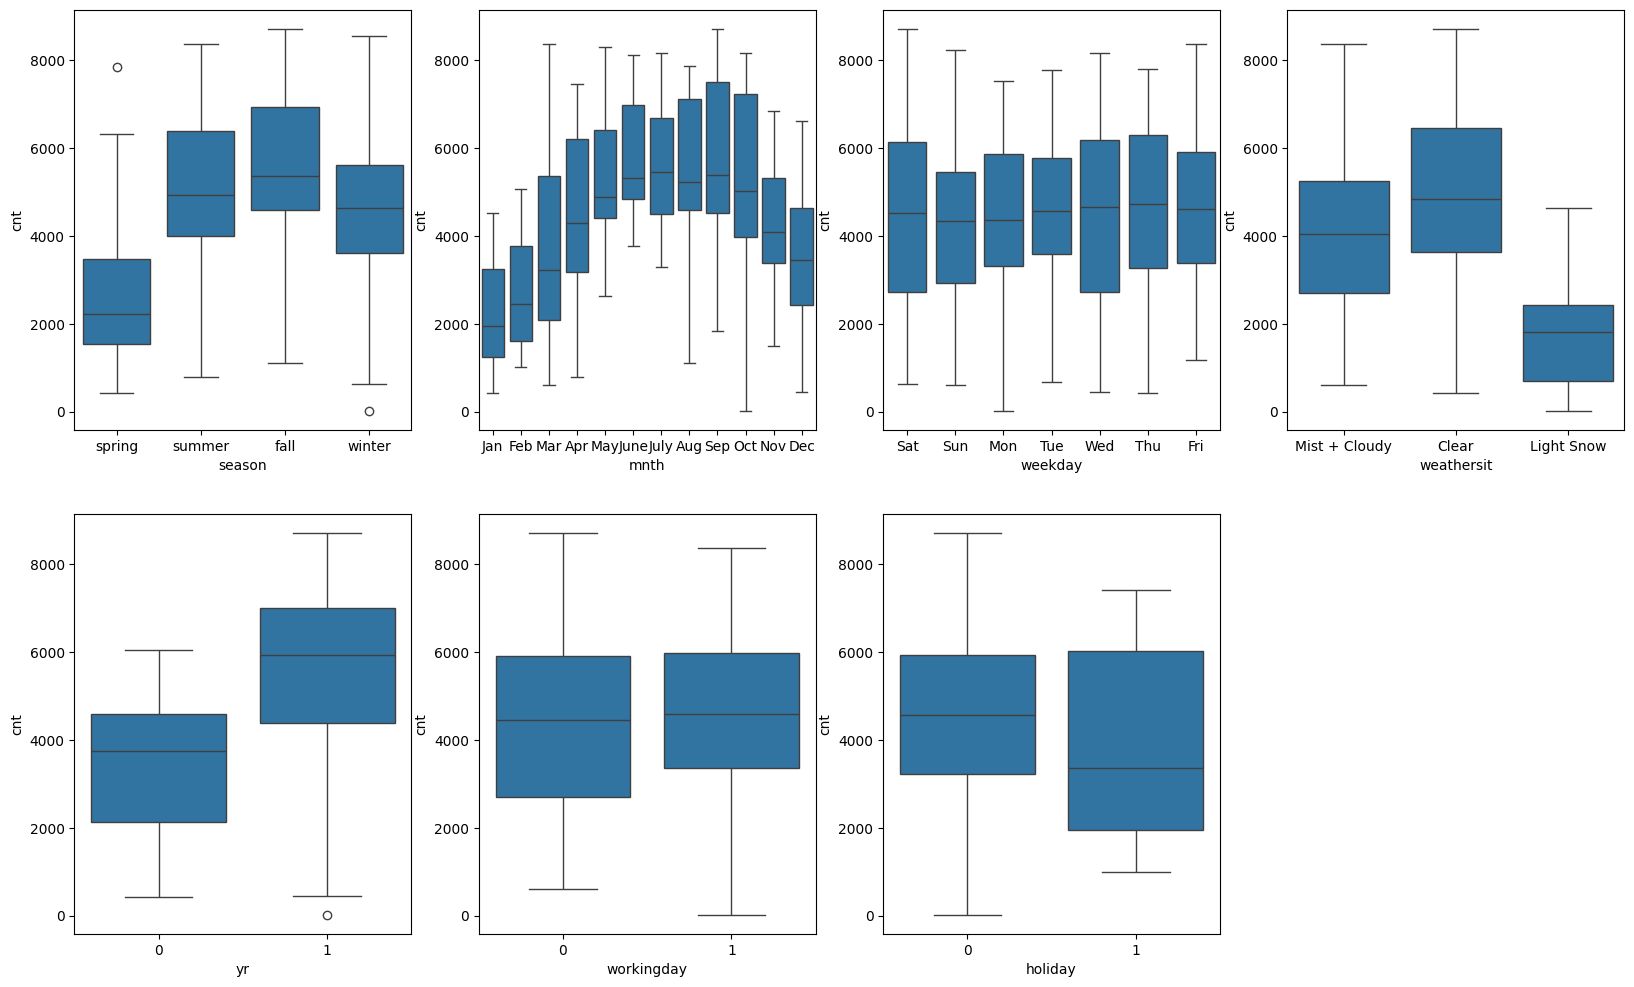

In [576]:
# Univariate analysis of categorical columns

bike_df['season']=bike_df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_df['mnth']=bike_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_df['weathersit']=bike_df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike_df['weekday']=bike_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bike_df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=bike_df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bike_df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike_df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=bike_df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=bike_df)
plt.show()


## Observations basd on the box plots of different categorical variable are as follows:

1) Bike rentals tend to increase during the summer and fall seasons.

2) September and October see the highest bike rental rates.

3) The busiest days for bike rentals are Saturday, Wednesday, and Thursday.

4) Most bike rentals occur during clear weather conditions.

5) The highest number of bike rentals occurred in 2019.

6) There isn’t a significant difference in bike rentals between working days and non-working days.

7) Bike rentals are higher on working day.

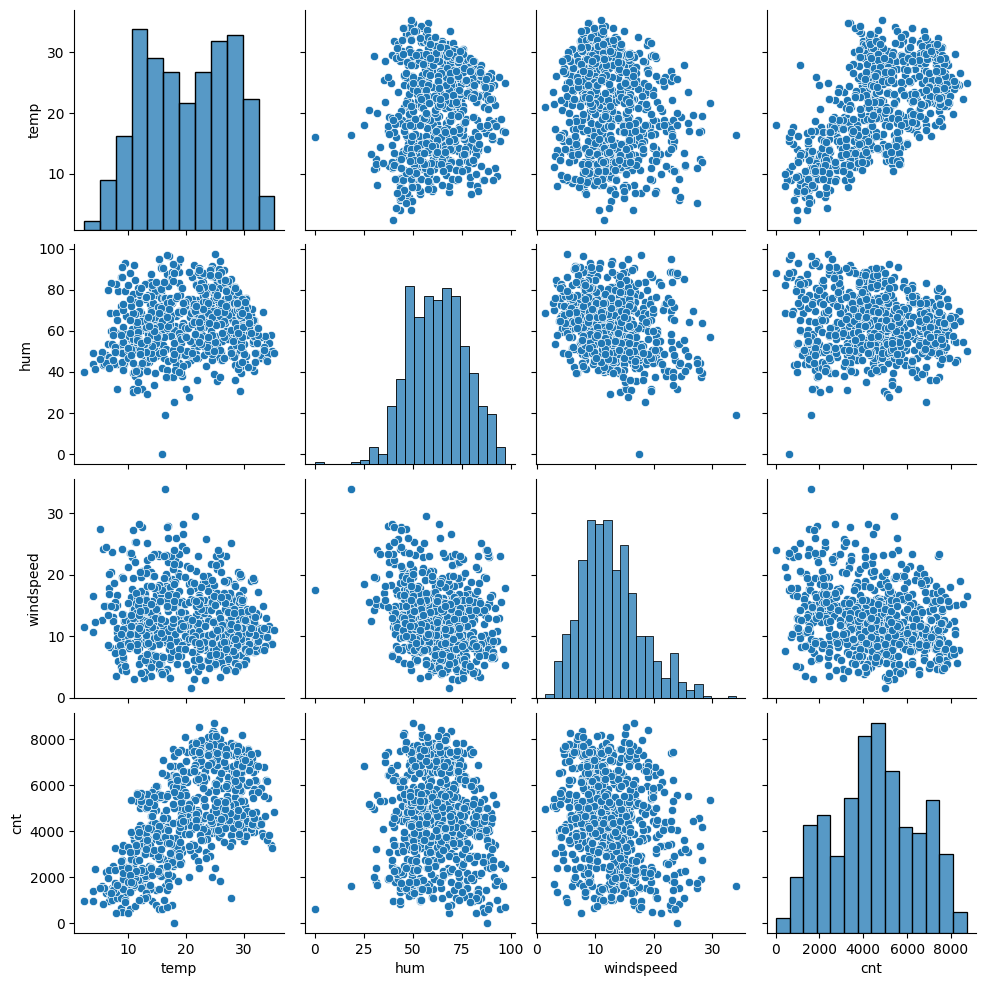

In [577]:
# Let's see how count of bike rides are related with other variables using scatter plot.
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(bike_df, vars=["temp", "hum",'windspeed','cnt'])
plt.show()

**Mapping of categorical columns**:
All the categorical variables mapped to numeric values where number of distinct values >2
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week  (0- Sun,1-Mon )
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



We can see there is a collinearity between cnt and temp, cnt and atemp and cnt and yr columns. Also there is collinearty between yr and season columns and weathrsit and hum columns. We can go  for a multi learn regression model to find out which features are impacting the count of bike rides.

In [578]:
#creating dummy variables 
#creating dummy variables for the variables of month, weekday, weathersit, seasons
month = pd.get_dummies(bike_df.mnth, drop_first=True)
weekday = pd.get_dummies(bike_df.weekday, drop_first=True)
weathersit = pd.get_dummies(bike_df.weathersit, drop_first=True)
season = pd.get_dummies(bike_df.season, drop_first=True)

In [579]:
#adding the dummy variables to the original dataframe
bike_df = pd.concat([bike_df,month, weekday, weathersit, season], axis=1)
bike_df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [580]:
#dropping the columns as dummy variables have been added
bike_df = bike_df.drop(['mnth','weekday','weathersit','season'], axis=1)
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


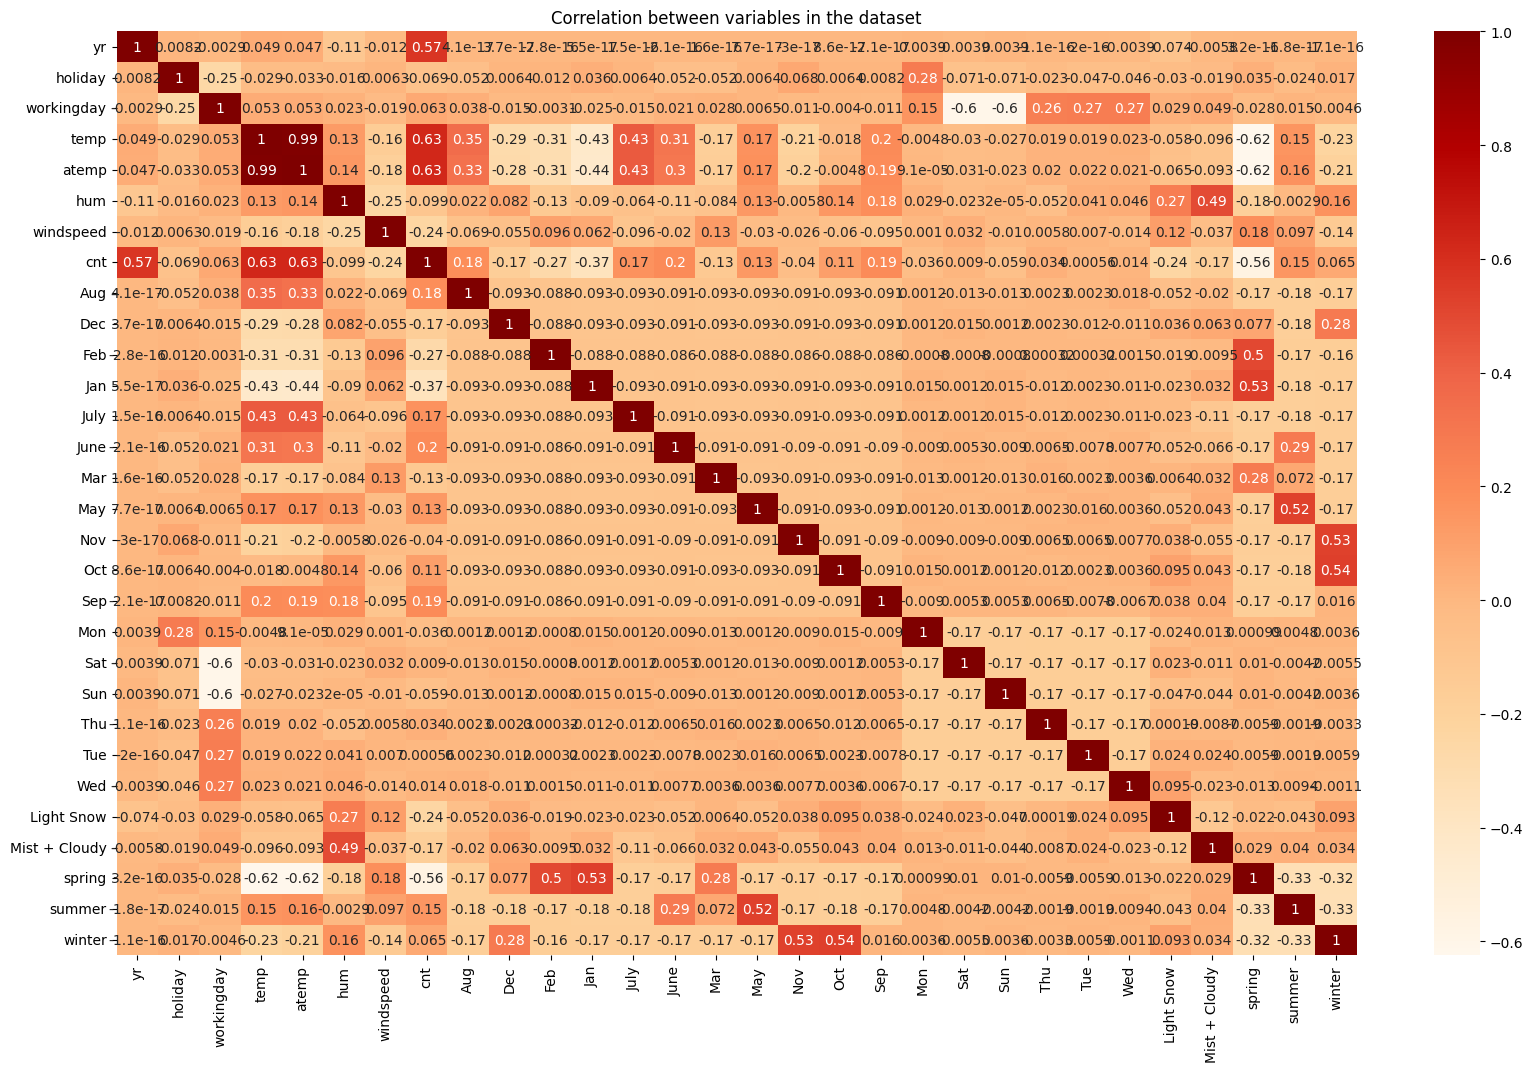

In [581]:
#making a heatmap to showcase correlation between the variables and decide whether we can perform linear regression on the dataset
plt.figure(figsize=(20, 12))
sns.heatmap(bike_df.corr(), cmap='OrRd', annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

In [582]:
# replacing boolean values with 1 and 0
for col in bike_df.columns:
    bike_df[col].replace([True,False],[1,0], inplace=True)
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [583]:
# converting boolean columns to numeric.
for col in bike_df.columns:
    if (bike_df[col].dtype ==bool):
        bike_df[col] = pd.to_numeric(bike_df[col], errors='coerce').astype('int64')

In [584]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   Aug            730 non-null    int64  
 9   Dec            730 non-null    int64  
 10  Feb            730 non-null    int64  
 11  Jan            730 non-null    int64  
 12  July           730 non-null    int64  
 13  June           730 non-null    int64  
 14  Mar            730 non-null    int64  
 15  May            730 non-null    int64  
 16  Nov            730 non-null    int64  
 17  Oct            730 non-null    int64  
 18  Sep       

## Step 2: Preparing the data for model training (train-test split, rescaling)

In [585]:
#splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [586]:
df_train, df_test = train_test_split(bike_df, train_size=0.7, random_state=100)


In [587]:
#checking the shape of the training dataset
df_train.shape

(510, 30)

In [588]:
#checking the shape of the test dataset
df_test.shape

(220, 30)

In [589]:
#we have to rescale the variables like hum, temp, windspeed, cnt as they have large values as compared to the other variables of the dataset
#we have to normalize these values using the scaler.fit_transform() 
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [590]:
#checking the normalized values of the train set after performing scaling 
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,23.500287,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,8.090963,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,24.131150,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 
We can see maximum is 1 and minumum is 0 for all the columns which means that the scaling is done successfully

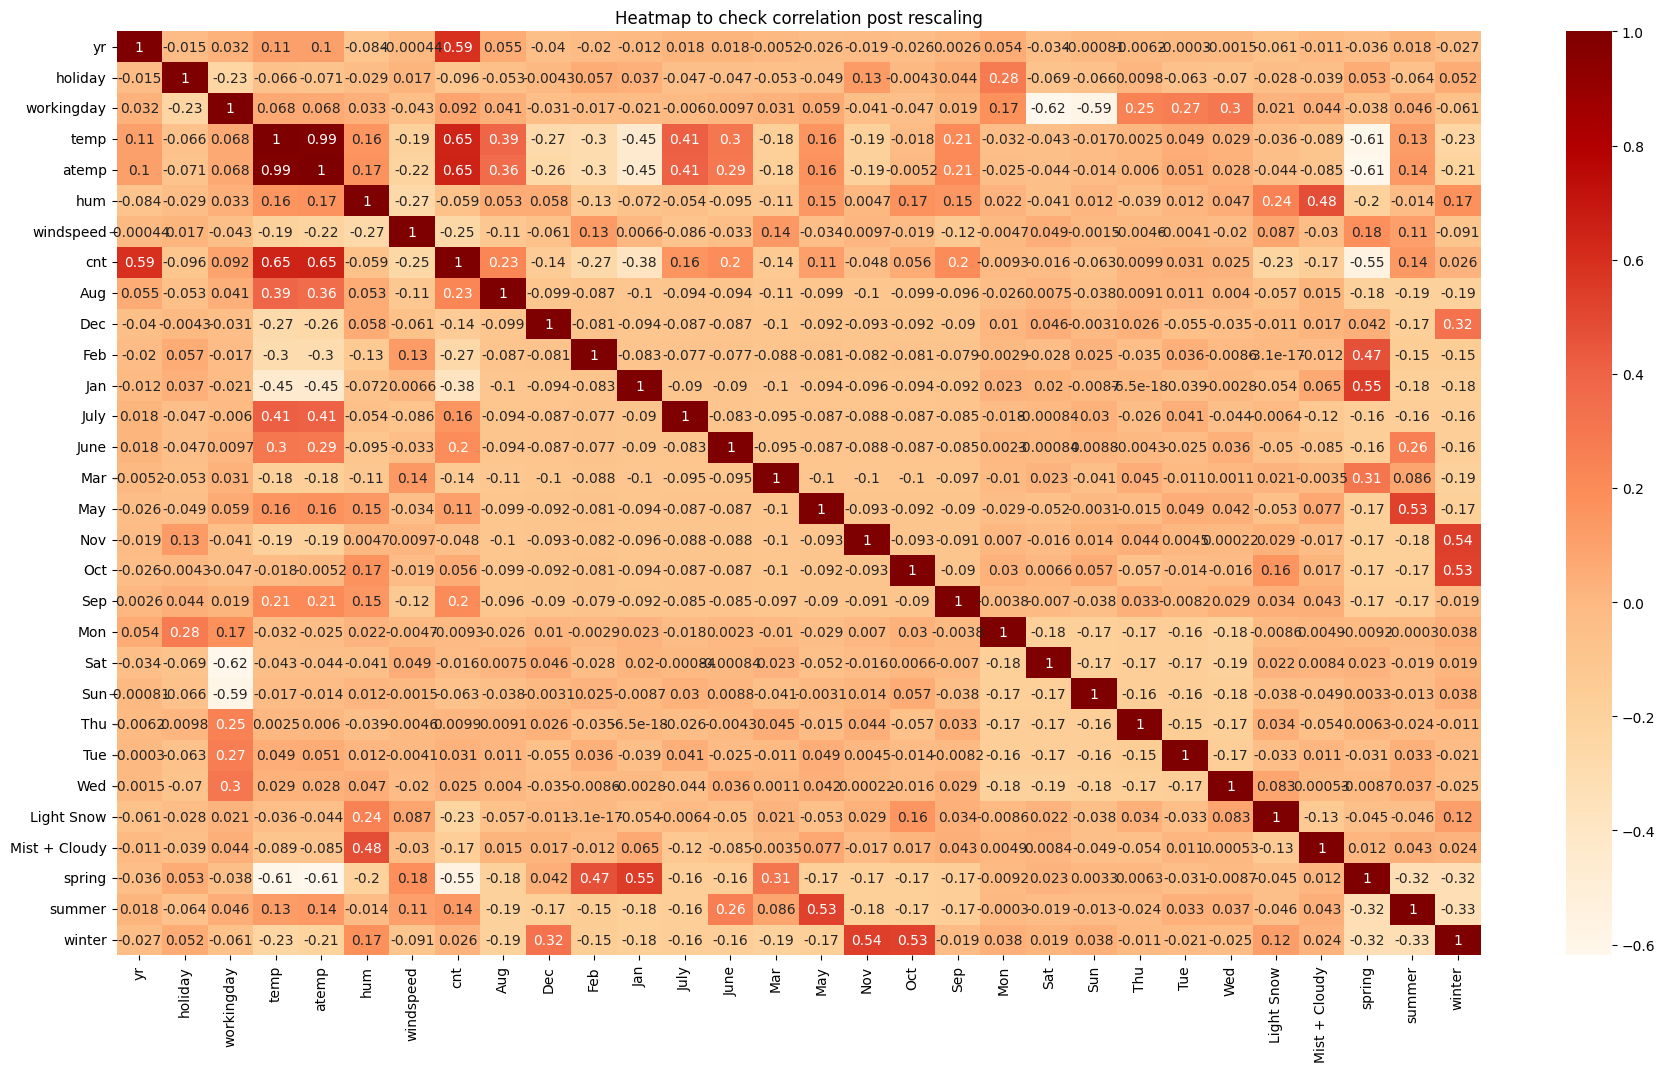

In [591]:
# checking the correlation coefficients to see which variables are highly correlated post data preparation and rescaling

plt.figure(figsize = (22, 12))
sns.heatmap(df_train.corr(), cmap="OrRd", annot=True)
plt.title('Heatmap to check correlation post rescaling')
plt.show()

### From the above heatmap we can see cnt is heavily related to temp

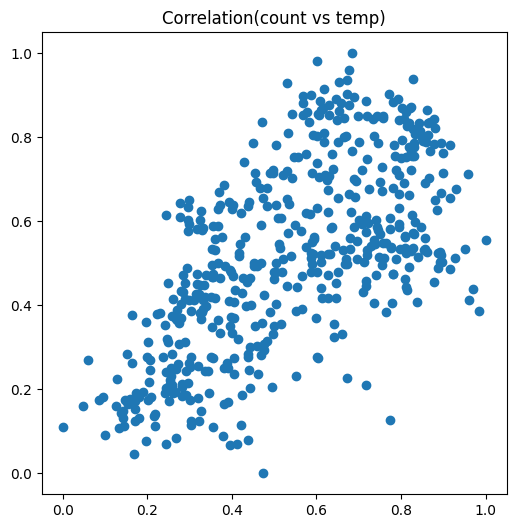

In [592]:
# deriving correlation between count and temp through a pair plot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation(count vs temp)')
plt.show()

## Step 3: Training the model

In [593]:
#building our first model using the variable temp
#preparing the variables for model building 

y_train = df_train.pop('cnt')
X_train = df_train

In [594]:
#checking the variables
y_train.head(5)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [595]:
X_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,20.6746,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,11.5850,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,16.0977,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [596]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   Aug            730 non-null    int64  
 9   Dec            730 non-null    int64  
 10  Feb            730 non-null    int64  
 11  Jan            730 non-null    int64  
 12  July           730 non-null    int64  
 13  June           730 non-null    int64  
 14  Mar            730 non-null    int64  
 15  May            730 non-null    int64  
 16  Nov            730 non-null    int64  
 17  Oct            730 non-null    int64  
 18  Sep       

In [597]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [598]:
X_train_sm

,const,temp
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666
111,1.0,0.345824
...,...,...
578,1.0,0.863973
53,1.0,0.202618
350,1.0,0.248216
79,1.0,0.462664


In [599]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.46e-61
Time:                        16:39:06   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is .416 which means 41% of the variance in the count quantity is explained by temp

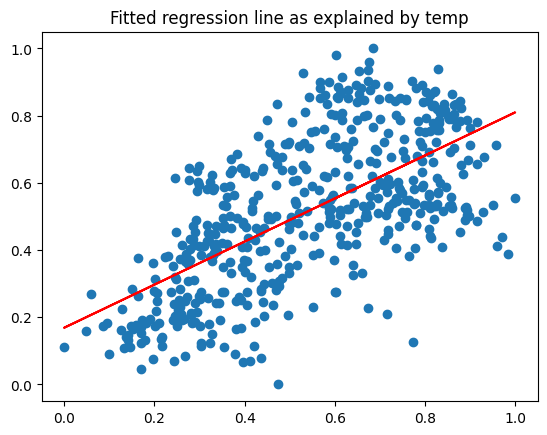

In [600]:
#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [601]:
X_train_sm = sm.add_constant(X_train_sm)

#create second model will all the variables
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [602]:
#checking summary with temp and yr as selected variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.46e-61
Time:                        16:39:07   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#
R-squared is now .853 which means 85.3% of the variance in the count quantity is explained by temperature and year data

### RFE Modelling technique
We previously calculated the R-squared values and determined the best fit lines using a manual approach for feature selection. Now, we will shift to an automated method to select the most relevant features for building optimized models while eliminating redundant variables. We will use Recursive Feature Elimination (RFE) in combination with Variance Inflation Factor (VIF) to identify which variables to drop

In [603]:
#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [604]:
#checking the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(15)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('Aug', np.False_, np.int64(7)),
 ('Dec', np.False_, np.int64(4)),
 ('Feb', np.False_, np.int64(5)),
 ('Jan', np.False_, np.int64(2)),
 ('July', np.True_, np.int64(1)),
 ('June', np.False_, np.int64(12)),
 ('Mar', np.False_, np.int64(14)),
 ('May', np.False_, np.int64(6)),
 ('Nov', np.False_, np.int64(3)),
 ('Oct', np.False_, np.int64(9)),
 ('Sep', np.True_, np.int64(1)),
 ('Mon', np.False_, np.int64(8)),
 ('Sat', np.True_, np.int64(1)),
 ('Sun', np.True_, np.int64(1)),
 ('Thu', np.False_, np.int64(11)),
 ('Tue', np.False_, np.int64(10)),
 ('Wed', np.False_, np.int64(13)),
 ('Light Snow', np.True_, np.int64(1)),
 ('Mist + Cloudy', np.True_, np.int64(1)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.True_, np.int64(1)),
 ('winter', 

In [605]:
#getting the selected feature variables in one one variable
true_rfe = X_train.columns[rfe.support_]
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'July',
       'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [606]:
#finding how many features selected automatically for our model
len(true_rfe)

15

In [607]:
#building model using selected RFE variables
#creating training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [608]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.199526
yr               0.229763
holiday         -0.018447
workingday       0.083669
temp             0.527708
hum             -0.161086
windspeed       -0.180875
July            -0.054616
Sep              0.081983
Sat              0.093668
Sun              0.040636
Light Snow      -0.245009
Mist + Cloudy   -0.056344
spring          -0.055546
summer           0.053733
winter           0.099214
dtype: float64

In [609]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        16:39:07   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200      0.000       0.145       0.254
yr                0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday        0.0837      0.010      8.665      0.000       0.065       0.103
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0937      0.012      8.040      0.000       0.071       0.117
Sun               0.0406      0.012      3.315      0.001       0.017       0.065
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     6.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [610]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [611]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,50.68
8,Sat,12.20
9,Sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,hum,1.91
11,Mist + Cloudy,1.57


### How to check the conditions for variables elimination?

Here are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course content.

High p-value, high VIF : definitely drop

High-Low:

High p, low VIF : remove these first, then build model again and check VIF again
Low p, high VIF : remove these later
Low p-value, low VIF : keep variable

In [612]:
#workingday variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        16:39:07   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2832      0.034      8.300      0.000       0.216       0.350
yr                0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0100      0.011      0.897      0.370      -0.012       0.032
Sun              -0.0430      0.012     -3.725      0.000      -0.066      -0.020
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [613]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.36
12,summer,2.79
10,Mist + Cloudy,2.30
0,yr,2.08
5,July,1.59
6,Sep,1.39


In [614]:
#Sat variable can be dropped due to low VIF and high p-value
X_train_new_2 = X_train_lr1.drop(['Sat'], axis = 1)
#adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.12e-192
Time:                        16:39:08   Log-Likelihood:                 517.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -947.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2858      0.034      8.409      0.000       0.219       0.353
yr                0.2295      0.008     28.639      0.000       0.214       0.245
holiday          -0.1041      0.025     -4.118      0.000      -0.154      -0.054
temp              0.5273      0.033     15.876      0.000       0.462       0.593
hum              -0.1623      0.037     -4.349      0.000      -0.236      -0.089
windspeed        -0.1801      0.025     -7.092      0.000      -0.230      -0.130
July             -0.0543      0.018     -3.004      0.003      -0.090      -0.019
Sep               0.0821      0.017      4.974      0.000       0.050       0.115
Sun              -0.0449      0.011     -3.952      0.000      -0.067      -0.023
Light Snow       -0.2447      0.026     -9.385      0.000      -0.296      -0.193
Mist + Cloudy    -0.0562      0.010     -5.411      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.696      0.007      -0.096      -0.015
summer            0.0537      0.015      3.627      0.000       0.025       0.083
winter            0.0995      0.017      5.834      0.000       0.066       0.133
==============================================================================
Omnibus:                       61.336   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.517
Skew:                          -0.618   Prob(JB):                     4.62e-34
Kurtosis:                       5.387   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [615]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,28.24
2,temp,16.04
4,windspeed,4.66
10,spring,4.01
12,winter,3.34
11,summer,2.79
9,Mist + Cloudy,2.30
0,yr,2.08
5,July,1.59
6,Sep,1.39


In [616]:
#hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.45e-189
Time:                        16:39:08   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2060      0.029      7.074      0.000       0.149       0.263
yr                0.2335      0.008     28.807      0.000       0.218       0.249
holiday          -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp              0.4907      0.033     15.004      0.000       0.426       0.555
windspeed        -0.1479      0.025     -5.981      0.000      -0.196      -0.099
July             -0.0492      0.018     -2.680      0.008      -0.085      -0.013
Sep               0.0760      0.017      4.541      0.000       0.043       0.109
Sun              -0.0483      0.012     -4.191      0.000      -0.071      -0.026
Light Snow       -0.2895      0.024    -11.878      0.000      -0.337      -0.242
Mist + Cloudy    -0.0822      0.009     -9.517      0.000      -0.099      -0.065
spring           -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer            0.0475      0.015      3.171      0.002       0.018       0.077
winter            0.0848      0.017      4.984      0.000       0.051       0.118
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [617]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,yr,2.07
11,winter,1.81
4,July,1.59
8,Mist + Cloudy,1.56
5,Sep,1.34
6,Sun,1.18


In [618]:
#windspeed variable can be dropped due to high p value and negative correlation with cnt
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)
#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.83e-183
Time:                        16:39:08   Log-Likelihood:                 489.93
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     498   BIC:                            -905.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1567      0.029      5.424      0.000       0.100       0.213
yr                0.2325      0.008     27.741      0.000       0.216       0.249
holiday          -0.1080      0.027     -4.059      0.000      -0.160      -0.056
temp              0.5026      0.034     14.887      0.000       0.436       0.569
July             -0.0495      0.019     -2.606      0.009      -0.087      -0.012
Sep               0.0803      0.017      4.645      0.000       0.046       0.114
Sun              -0.0484      0.012     -4.055      0.000      -0.072      -0.025
Light Snow       -0.3042      0.025    -12.131      0.000      -0.354      -0.255
Mist + Cloudy    -0.0805      0.009     -9.016      0.000      -0.098      -0.063
spring           -0.0749      0.021     -3.490      0.001      -0.117      -0.033
summer            0.0377      0.015      2.446      0.015       0.007       0.068
winter            0.0859      0.018      4.884      0.000       0.051       0.121
==============================================================================
Omnibus:                       70.260   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.572
Skew:                          -0.672   Prob(JB):                     5.61e-43
Kurtosis:                       5.712   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [619]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.27
0,yr,2.06
9,summer,1.95
10,winter,1.61
3,July,1.59
7,Mist + Cloudy,1.56
8,spring,1.43
4,Sep,1.34
5,Sun,1.18
6,Light Snow,1.07


In [620]:
#July is dropped because of low VIF and the p-value
X_train_new_5 = X_train_lr4.drop(['July'], axis = 1)
#adding constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.14e-183
Time:                        16:39:08   Log-Likelihood:                 486.47
No. Observations:                 510   AIC:                            -950.9
Df Residuals:                     499   BIC:                            -904.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1487      0.029      5.145      0.000       0.092       0.205
yr                0.2330      0.008     27.652      0.000       0.216       0.250
holiday          -0.1071      0.027     -4.002      0.000      -0.160      -0.055
temp              0.4900      0.034     14.580      0.000       0.424       0.556
Sep               0.0938      0.017      5.647      0.000       0.061       0.126
Sun              -0.0495      0.012     -4.130      0.000      -0.073      -0.026
Light Snow       -0.3052      0.025    -12.099      0.000      -0.355      -0.256
Mist + Cloudy    -0.0792      0.009     -8.832      0.000      -0.097      -0.062
spring           -0.0637      0.021     -3.012      0.003      -0.105      -0.022
summer            0.0525      0.014      3.646      0.000       0.024       0.081
winter            0.0981      0.017      5.749      0.000       0.065       0.132
==============================================================================
Omnibus:                       72.159   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.039
Skew:                          -0.703   Prob(JB):                     1.99e-42
Kurtosis:                       5.657   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [621]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.97
0,yr,2.06
8,summer,1.64
6,Mist + Cloudy,1.55
9,winter,1.46
7,spring,1.35
3,Sep,1.23
4,Sun,1.18
5,Light Snow,1.07
1,holiday,1.05


## Several points to be noted as we select this model as the final model:
The model selection depends on several factor such as the p-value, the VIF and the R-squared value. The p-value gives us input on the significance of the variables, the VIF about the correaltion between the participating variables and the R-squared value gives us an indication about the strength of the model. This value defines the percentage of the variance in the dependent variable that the independent variables explain collectively.

- The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis.

- The VIF should be generally <5 and we have achieved that condition with all the variables.

- The R-squared value achieved is 82.7% which suggests a high correlation between the dependent variable (count) and the independent variables and the variables selected accurately help us map the variance of the dependent variable ie count.

## Step 4: Residual analysis

In [622]:
X_train_lr5 = sm.add_constant(X_train_lr5)
#X_train_lm5.columns
X_train_lr5

,const,yr,holiday,temp,Sep,Sun,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,0,0.815169,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0,1,0,0,1,0,0
482,1.0,1,0,0.395666,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0,0,0,1,0,0,1
79,1.0,0,0,0.462664,0,0,0,1,0,1,0


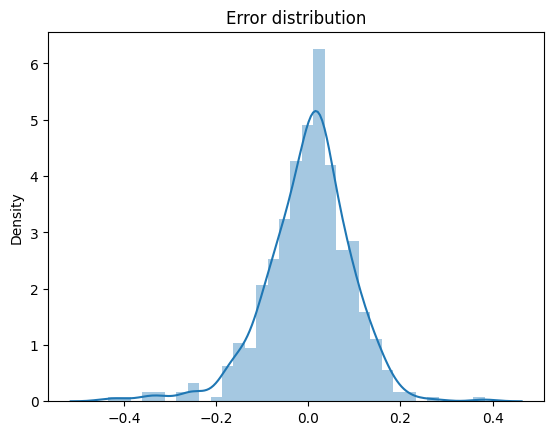

In [623]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr5)
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

In [624]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [625]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
df_test[scaler_var] = scaler.transform(df_test[scaler_var])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,24.250312,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,8.281075,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,17.090025,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,24.700000,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,31.124313,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [626]:
#building test model using the variable temp
#preparing the variables for model building 

y_test = df_test.pop('cnt')
X_test = df_test


In [627]:

y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [628]:
# feature variables 
X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'Sep', 'Sun', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

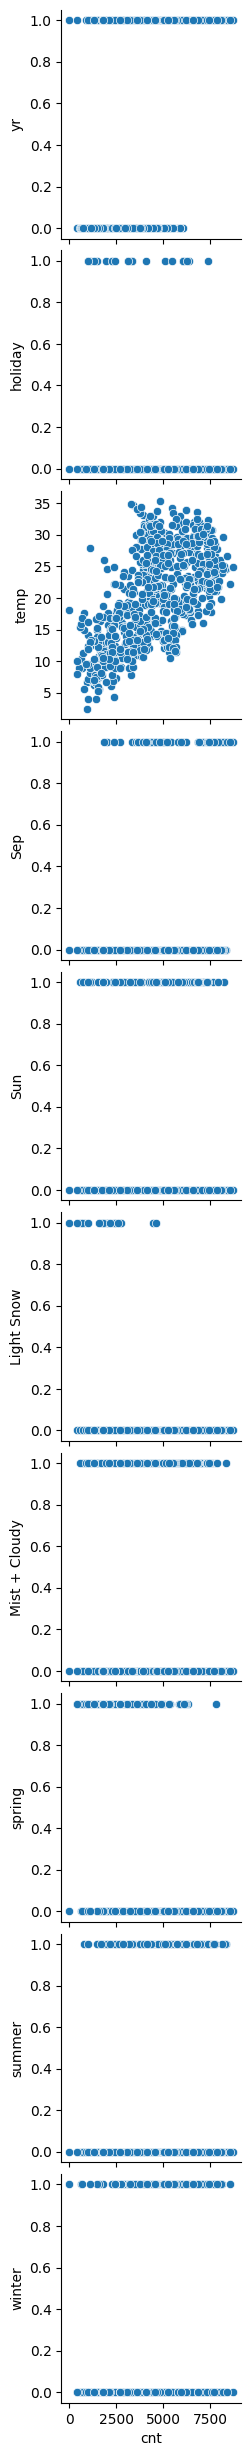

<Figure size 1600x1200 with 0 Axes>

In [629]:
#dropping constant
X_train_lr5.drop(columns= 'const', inplace = True)
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)
#making predictions
y_pred = lr_model.predict(X_test_new)
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(df, y_vars=X_train_lr5.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

We can now validate the assumptions of linear regression in the model:
As we can see, temperature has a linear relationship with the dependent variable (cnt).

As we have observed earlier every variable in our chosen model has a VIF<5 which ensures that there is no multicollinearity.

The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.

## Step 5: Prediction and evaluation of the test set

r2 score on the test set is 0.8113189584286533
r2 score on the train set is 0.8271252564127047


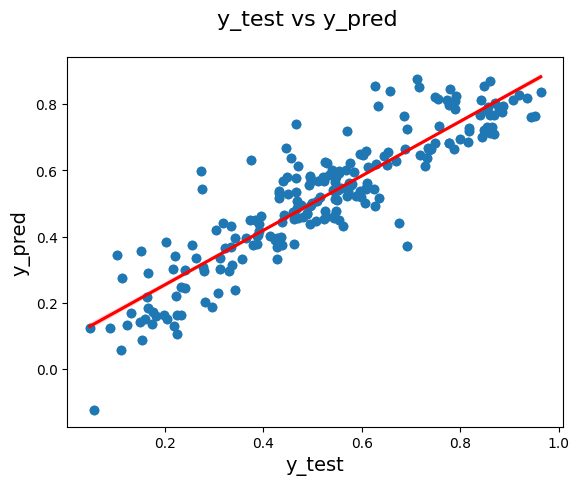

In [630]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [631]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008689716000619054
Mean squared error of the test set is 0.00902164805945192


In [633]:
fig = sm.qqplot(train_mse, line='45')  # 'line' parameter adds a 45-degree reference line

# Step 3: Display the plot
plt.title("Q-Q Plot")
plt.show()

IndexError: tuple index out of range

Since our model's mean squared error is very close to 0, it shows that our model accurately predicts the variance between both the train and the test datasets.

## Summary:

After completing data interpretation, visualization, data preparation, model building and training, residual analysis, and test model evaluation, the key findings are as follows:

- The R-squared value for the training set is 82.71%, while the test set's value is 81.13%. This indicates that our model accurately explains the variance in the test data, suggesting it is a well-performing model.

- The mean squared error for both the training and test sets is nearly zero, signifying that the model predicts variance in the test data with high accuracy. We used p-values and Variance Inflation Factor (VIF) to identify significant variables, and Recursive Feature Elimination (RFE) for automated feature selection.

- The analysis reveals that bike demand for BoomBikes is primarily influenced by temperature and whether it is a working day. Additionally, there is higher demand for rentals in the winter compared to summer and spring. The months of September and October saw increased usage of rentals, with peak demand occurring on Wednesdays, Thursdays, and Saturdays, and more rentals on holidays.

- These insights offer a deeper understanding of the bike rental market and user behavior. A key recommendation is to implement aggressive marketing strategies during the summer and spring seasons to boost rental numbers. Since demand is lower in the summer, targeted marketing during the first half of the year could drive higher rentals. There should also be strategies in place to incentivize rentals on days with less favorable weather conditions. Lastly, with more rentals observed in 2019 than in 2018, it is crucial to analyze ways to retain repeat customers as the market expands.